In [1]:
import pandas as pd
import numpy as np
from sklearn import tree
import graphviz

In [2]:
df = pd.read_csv('processed_imu_data.csv', names=['a1','a2','a3','walking'], skiprows=1)
X = df.drop('walking', axis=1)
y = df['walking']

In [3]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

clf = tree.DecisionTreeClassifier(max_depth=1)
clf = clf.fit(X_train, y_train)

In [4]:
y_predict = clf.predict(X_test)

from sklearn.metrics import accuracy_score

accuracy_score(y_test, y_predict)

0.97350230414746541

In [5]:
from sklearn.metrics import confusion_matrix

pd.DataFrame(
    confusion_matrix(y_test, y_predict),
    columns=['Predicted Not Walking', 'Predicted Walking'],
    index=['True Not Walking', 'True Walking']
)

,Predicted Not Walking,Predicted Walking
True Not Walking,973,25
True Walking,21,717


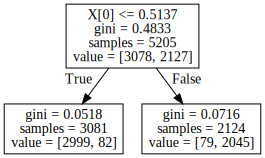

In [7]:
dot_data = tree.export_graphviz(clf, out_file=None) 
graph = graphviz.Source(dot_data) 
graph.render("IMU_tree") 
graph 